In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

RESULTS_PATH = Path("/Users/jessbreda/Desktop/github/ca-sdoh/code/jess/results")

FIGURES_PATH = Path("/Users/jessbreda/Desktop/github/ca-sdoh/figures")

sns.set_context("talk")

In [52]:
conditions = ["hf", "copd", "pn"]

dfs = []
for cond in conditions:
    dfs.append(pd.read_csv(RESULTS_PATH / f"{cond}_models_results.csv"))

results = pd.concat(dfs, ignore_index=True)

In [53]:
lmpal = sns.color_palette("rocket", 4)
lmpal = lmpal.as_hex()
lmpal

['#4c1d4b', '#a11a5b', '#e83f3f', '#f69c73']

In [54]:
rfpal = sns.color_palette("mako", 4)
rfpal = rfpal.as_hex()
rfpal

['#382a54', '#395d9c', '#3497a9', '#60ceac']

In [55]:
pallette = [lmpal[-1], rfpal[-1]]

Text(0.5, 1.0, 'Model Error by Features, Type')

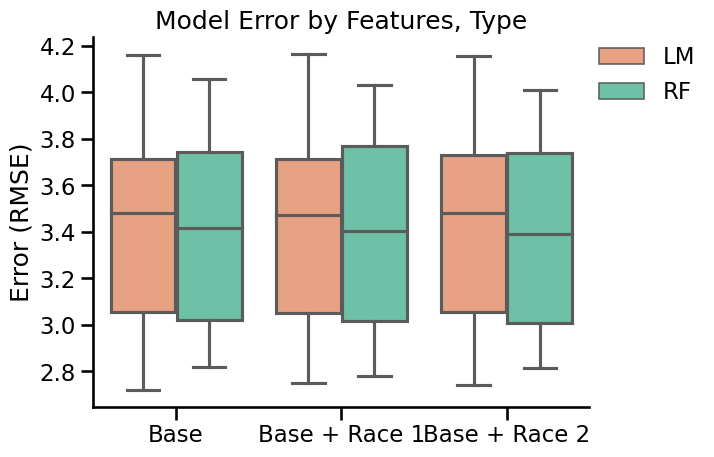

In [56]:
sns.boxplot(data=results, x="model_name", y="rmse", hue="model_type", palette=pallette)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Error (RMSE)")
plt.xlabel("")
plt.title("Model Error by Features, Type")

In [57]:
bi_results = results.query("model_name != 'Base + Race 2'").copy()

# Define the mapping of old values to new values
mapping = {"LM": "Linear Model", "RF": "Random Forest"}

# Use the replace() function to update the values in the 'model_type' column
bi_results["model_type"] = bi_results["model_type"].replace(mapping)

mapping = {"Base + Race 1": "Base + Race"}
bi_results["model_name"] = bi_results["model_name"].replace(mapping)

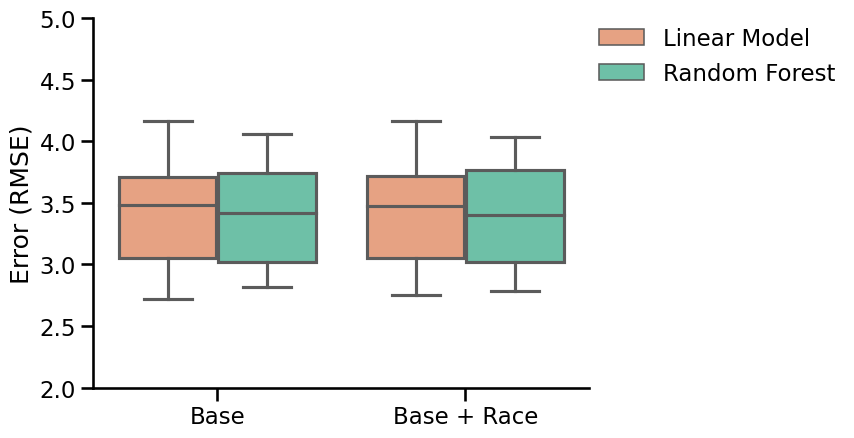

In [58]:
sns.boxplot(
    data=bi_results, x="model_name", y="rmse", hue="model_type", palette=pallette
)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Error (RMSE)")
plt.xlabel("")
plt.ylim(2, 5)

# # Save the figure with high resolution
f_name = "model_comparison_boxplot.png"
plt.savefig(FIGURES_PATH / f_name, dpi=300, bbox_inches="tight")

Text(0.5, 1.0, 'Model Fit by Features, Type')

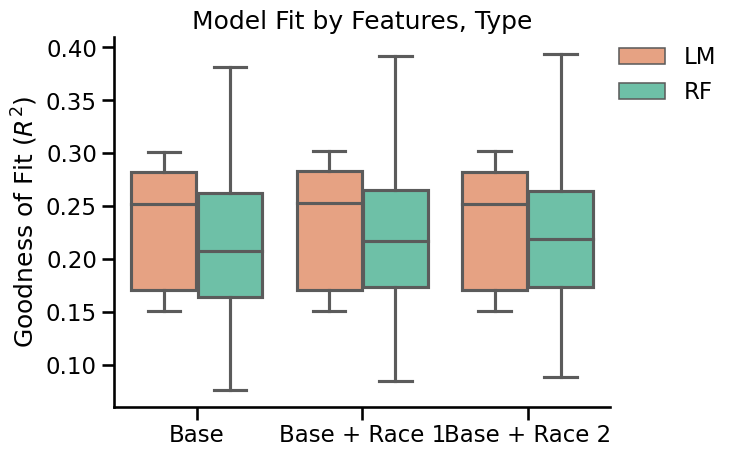

In [59]:
sns.boxplot(data=results, x="model_name", y="r2", hue="model_type", palette=pallette)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Goodness of Fit ($R^2$)")
plt.xlabel("")
plt.title("Model Fit by Features, Type")

### Importances

In [60]:
dfs = []
for cond in conditions:
    dfs.append(pd.read_csv(RESULTS_PATH / f"rf_{cond}_feature_importances.csv"))

importances = pd.concat(dfs, ignore_index=True)

In [63]:
top5 = (
    importances.groupby("feature").importance.mean().sort_values(ascending=True).tail(5)
).reset_index()
top5_std = (
    importances.groupby("feature").importance.std().sort_values(ascending=True).tail(5)
).reset_index()

top5["std"] = top5_std["importance"]

In [64]:
top5

,feature,importance,std
0,beneficiary_avg_age,0.060634,0.023761
1,pct_non_white,0.079995,0.024269
2,pct_diabetes,0.110174,0.025676
3,pct_psychotic_disorders,0.125050,0.027835
4,pct_medicare_medicaid,0.148994,0.066164


In [65]:
top5["plot_names"] = [
    "Age",
    "Race",
    "Diabetes",
    "Mental Disorders",
    "Dual Enrollment",
]

In [66]:
top5

,feature,importance,std,plot_names
0,beneficiary_avg_age,0.060634,0.023761,Age
1,pct_non_white,0.079995,0.024269,Race
2,pct_diabetes,0.110174,0.025676,Diabetes
3,pct_psychotic_disorders,0.125050,0.027835,Mental Disorders
4,pct_medicare_medicaid,0.148994,0.066164,Dual Enrollment


In [67]:
color = [pallette[1], rfpal[1], pallette[1], pallette[1], pallette[1]]
f"total number of features is {len(importances.feature.unique())}"

'total number of features is 16'

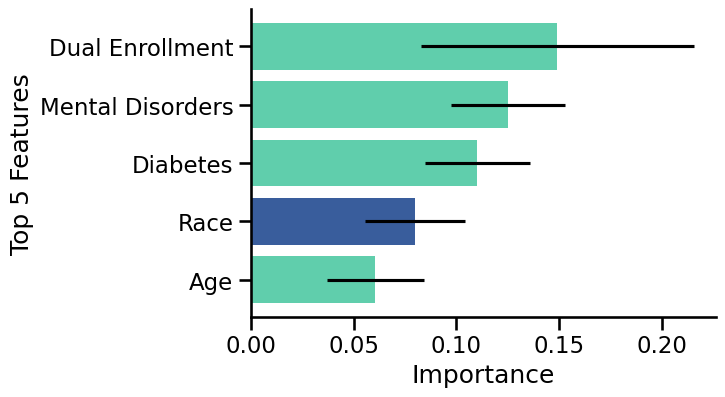

In [68]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
ax.barh(top5.plot_names, top5.importance, xerr=top5["std"], color=color)
ax.set_xlabel("Importance")
ax.set_ylabel("Top 5 Features")

f_name = "top5_importance_all.png"
plt.savefig(FIGURES_PATH / f_name, dpi=300, bbox_inches="tight")

### 90th percentile

In [69]:
importances_90th = pd.read_csv(
    RESULTS_PATH / "rf_all_conds_feature_importances_90th.csv"
)

top5 = (
    importances_90th.groupby("feature")
    .importance.mean()
    .sort_values(ascending=True)
    .tail(5)
).reset_index()
top5_std = (
    importances_90th.groupby("feature")
    .importance.std()
    .sort_values(ascending=True)
    .tail(5)
).reset_index()

top5["std"] = top5_std["importance"]

In [70]:
top5

,feature,importance,std
0,pct_psychotic_disorders,0.062692,0.040103
1,pct_alzheimers,0.070408,0.041801
2,pct_diabetes,0.117229,0.051329
3,pct_medicare_medicaid,0.145188,0.060234
4,pct_non_white,0.169310,0.075428


In [71]:
top5["plot_names"] = [
    "Mental Disorders",
    "Alzheimer's",
    "Diabetes",
    "Dual Enrollment",
    "Race",
]

In [72]:
color = [pallette[1], pallette[1], pallette[1], pallette[1], rfpal[1]]
f"total number of features is {len(importances_90th.feature.unique())}"

'total number of features is 16'

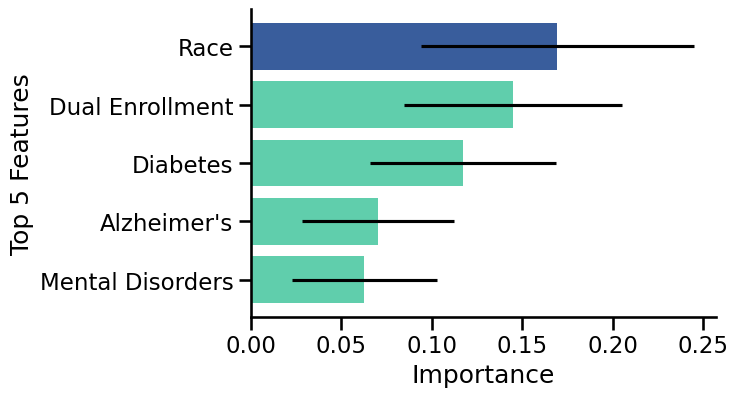

In [73]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
ax.barh(top5.plot_names, top5.importance, xerr=top5["std"], color=color)
ax.set_xlabel("Importance")
ax.set_ylabel("Top 5 Features")

f_name = "top5_importance_all_90th.png"
plt.savefig(FIGURES_PATH / f_name, dpi=300, bbox_inches="tight")